In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

%matplotlib inline
%config INlineBackend.figure_format = 'svg'


In [10]:
# global vars
## path variables
path_folder_dmlTestScripts= "C:/Users/TobiasSchmidt/Desktop/IBM/PE_4/SystemML/dml_test_scripts/"
path_folder_multiHouseholdConsumption = path_folder_dmlTestScripts + "multiple_household_power_consumption/"
path_folder_IndividualHouseholds = path_folder_multiHouseholdConsumption + "Individual_Households/"
### this file is taken from: https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014
### The data set contains electricity consumption of 370 points/clients.
### Values are in kW of each 15 min
path_file_multiHouseholdConsMaster = path_folder_multiHouseholdConsumption + "ElectricityLoadDiagramm2011_2014-master.csv"
filename_individualHouseholdConsMaster = "ElectricityLoadDiagramm2011_2014-master.csv"

In [11]:
consumption_master = pd.read_csv(path_file_multiHouseholdConsMaster, 
                 sep = ";", na_values=["0"], decimal = ",",
                 engine = "c",
                 #nrows = 100000,
                 low_memory = False,
                 memory_map = True,
                 parse_dates=[0],
                 index_col=[0])

In [12]:
consumption_master

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


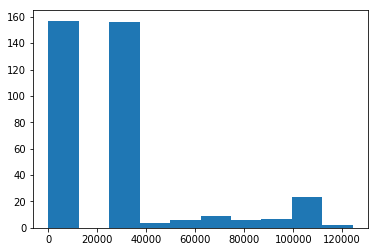

In [13]:
nandistrib = consumption_master.isnull().sum()
plt.hist(nandistrib)
nandistrib.to_csv(path_folder_IndividualHouseholds + "AmountNullValuePerDiagramm.csv", sep=';', encoding='utf-8')

In [14]:
consumption_master.dtypes
consumption_master.shape

(140256, 370)

In [15]:
def generateAndSaveDiagramms(key, folderpath) :
    individualConsumption = consumption_master[key]
    hourlyIndividualConsumption = individualConsumption.resample("H")
    dailyIndividualConsumption = individualConsumption.resample("D")
    weeklyIndividualConsumption = individualConsumption.resample("W")
    monthlyIndividualConsumption = individualConsumption.resample("M")

    figMedian = plt.figure()
    plt.title('Electricty Load Diagramm', fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Electricity Consumption in kW')
    individualConsumption.plot(label = "quarter hourly original data")
    hourlyIndividualConsumption.median().plot(label = "hourly median")
    dailyIndividualConsumption.median().plot(label = "daily median")
    weeklyIndividualConsumption.median().plot(label = "weekly median")
    monthlyIndividualConsumption.median().plot(label = "monthly median")
    plt.legend()
    plt.savefig(folderpath + "ElectricityLoadDiagrammWithMedian.png")
    plt.close(figMedian)

    figMean = plt.figure()
    plt.title('Electricty Load Diagramm', fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Electricity Consumption in kW')
    individualConsumption.plot(label = "quarter hourly original data")
    hourlyIndividualConsumption.mean().plot(label = "hourly mean")
    dailyIndividualConsumption.mean().plot(label = "daily mean")
    weeklyIndividualConsumption.mean().plot(label = "weekly mean")
    monthlyIndividualConsumption.mean().plot(label = "monthly mean")
    plt.legend()
    plt.savefig(folderpath + "ElectricityLoadDiagrammWithMean.png")
    plt.close(figMean)
    
    figOriginalData = plt.figure()
    plt.title('Electricty Load Diagramm', fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Electricity Consumption in kW')
    individualConsumption.plot(label = "quarter hourly original data")
    plt.legend()
    plt.savefig(folderpath + "ElectricityLoadDiagramm.png")
    plt.close(figOriginalData)


In [16]:
for key in consumption_master.keys():
    if nandistrib[key] == 0:
        prePath = path_folder_IndividualHouseholds + key + "-"
        consumption_master[key].to_csv(prePath + filename_individualHouseholdConsMaster, sep=';', encoding='utf-8')
        consumption_master[key].to_csv(prePath + "NoTimestamp-" + filename_individualHouseholdConsMaster, sep=';', encoding='utf-8', index = False)
        #generateAndSaveDiagramms(key, prePath)

In [ ]:
#generateAndSaveDiagramms("MT_158", path_folder_IndividualHouseholds)

In [17]:
def readIndividualHousehold (key):
    readPath = path_folder_IndividualHouseholds + key + "-NoTimestamp-" + filename_individualHouseholdConsMaster
    return pd.read_csv(readPath, 
                 sep = ";",
                 parse_dates=[0],
                 index_col=[0], header = None)

In [18]:
individualHousehold = readIndividualHousehold ("MT_172")

In [19]:
individualHousehold

""
0
80.797011
82.042341
79.539228
79.539228
80.797011
70.610212
75.591532
69.364882
74.346202
